## 1. Dowload Web

In [1]:
import requests
url= 'https://www.ultimahora.com/'
r_page= requests.get(url)

In [2]:
r_page.status_code

200

In [3]:
r_page.headers

{'Date': 'Sun, 25 Dec 2022 21:24:09 GMT', 'Content-Encoding': 'gzip', 'Content-Type': 'text/html; charset=UTF-8', 'Accept-Ranges': 'bytes', 'Server': 'nginx', 'Cache-Control': 'public, max-age=60, s-maxage=60', 'x-td-cache-last-generation': '2022-12-25 18:19:05', 'X-Shield-Cache-Expires': '30', 'X-VC-TTL': '60.000', 'X-TD-Cacheable': 'YES', 'x-td-control': 'CC:start; CCT:mc; TOUCH:', 'x-td-mobile': 'false', 'X-TD-Host': 'oregon-varnish-cache-node, oregon-front2', 'X-VC-Age': '4', 'X-VC-D-Date': 'Sun, 25 Dec 2022 21:23:47 GMT', 'X-VC': '825097363 840177076', 'X-VC-Cache': 'hit cacheable', 'Vary': 'Accept-Encoding,User-Agent', 'x-sp-metadata': 'HS256.CImbo50GEocBCiQ5NzhlNWRmMS03Y2RkLTRhZWYtOThkZC01ZDc2MjZjMDhiZTMQoKOE8Jz79gIaBgj5/qKdBiINMTgxLjk0LjIzMy4xNii4VzACOARCFlRMU19BRVNfMTI4X0dDTV9TSEEyNTZaIDhkOWY3NzQ3Njc1ZTI0NDU0Y2Q5YjdlZDM1YzU4NzA3GiwIARIkMWEzMTdkOWItYjgwYS00ZGNjLWE5Y2ItMWVmNWNmYjQ1MjJiGI2bAiIYCAISFGNkczIwNy5lejEuaHdjZG4ubmV0.NsMTYUYfzAfp2eWKIZYjOc6gIjQw63O8J+EUa98/Dpo=', 'X-HW':

In [4]:
r_page.request.method

'GET'

In [5]:
#r_page.content

## 2. Parse HTML with BeatifulSoup

In [6]:
from bs4 import BeautifulSoup

In [7]:
soup_page = BeautifulSoup(r_page.text, 'lxml')

In [8]:
type(soup_page)

bs4.BeautifulSoup

In [9]:
#print(soup_page.prettify)

## 3. Extrat Information

In [13]:
#get all section
section = soup_page.find_all('li', attrs={'class':'col-6 item-menu'})


18


In [14]:
title_1 = section[0]
title_1

<li class="col-6 item-menu"> <a alt="Ultima Hora | Nacionales" href="https://www.ultimahora.com/contenidos/nacional.html" target="" title="Ultima Hora | Nacionales">
                    Nacionales
                </a></li>

In [15]:
#get link
link = title_1.a.get('href')
print (link)

https://www.ultimahora.com/contenidos/nacional.html


In [16]:
# get all links
links_section = [i.a.get('href') for i in section]
links_section

['https://www.ultimahora.com/contenidos/nacional.html',
 'https://www.ultimahora.com/contenidos/edicion_impresa.html',
 'https://d10.ultimahora.com/',
 'https://www.ultimahora.com/contenidos/brand-voice.html',
 'https://www.ultimahora.com/contenidos/mundo.html',
 'https://www.ultimahora.com/contenidos/Sociedad.html',
 'https://www.ultimahora.com/contenidos/arte-y-espectaculos.html',
 'https://www.ultimahora.com/contenidos/politica-privacidad.html',
 'https://media.ultimahora.com/adjuntos/161/documentos/009/610/0009610703.pdf?0000-00-00-00-00-00',
 'https://media.ultimahora.com/adjuntos/161/documentos/009/610/0009610721.pdf?0000-00-00-00-00-00',
 'mailto:Publicidad_Digital@uhora.com.py',
 'https://www.ultimahora.com/empresas-y-negocios-a28856.html',
 'https://www.ultimahora.com/correo-semanal-a60.html',
 'https://www.ultimahora.com/contenidos/colecciones_UH.html',
 'https://www.ultimahora.com/contenidos/expo_rodados.html',
 'https://www.ultimahora.com/contenidos/expouniversidades.html',

In [17]:
#get title
title_1_1=title_1.get_text()
print(title_1_1.strip())

Nacionales


In [18]:
# metodo strip para eliminar espacios en blanco
titles_section=[i.get_text().strip() for i in section]
titles_section

['Nacionales',
 'Impreso',
 'D10',
 'Brand Voice',
 'Mundo',
 'Sociedad',
 'Arte',
 'Politicas de Privacidad',
 'Bases y Condiciones - Servicio de Suscripción a Crédito',
 'Bases y Condiciones - Servicio de Publicación e Impresión',
 'Anuncie con nosotros',
 'Empresariales',
 'Correo Semanal',
 'Colecciones ÚH',
 'Expo Rodados',
 'Expo Universidades',
 'Opinion',
 'Fúnebres']

In [40]:
# now, try if 1 web is working
valid_link_1 = requests.get(links_section[0])
valid_link_1.status_code

200

In [41]:
#get XPATH
from lxml import etree
soup_link_1=BeautifulSoup(valid_link_1.text, 'lxml')
xp_link_1= etree.HTML(str(soup_link_1))

In [52]:
xp_link_1.xpath("//div[@class='col-12 col-lg-8']//*[@class='article-title']//a")[0].text

'Accidentes dejan tres motociclistas muertos durante esta Navidad'

In [53]:
xp_link_1.xpath("//div[@class='col-12 col-lg-8']//*[@class='article-title']//a")[0].get('href')

'https://www.ultimahora.com/accidentes-dejan-tres-motociclistas-muertos-esta-navidad-n3040449.html'

## 4. Errors

In [55]:
links_section[0]

'https://www.ultimahora.com/contenidos/nacional.html'

In [54]:
#requets
valid_link_1 = requests.get(links_section[0])
if valid_link_1.status_code == 200:
    #succes
    print('succes')
else:
    #Error
    print('error')

succes


In [57]:
#create a bad url
bad_url=links_section[0].replace('a','z')
bad_url

'https://www.ultimzhorz.com/contenidos/nzcionzl.html'

In [59]:
# test error
valid_link_error = requests.get(bad_url)
if valid_link_error.status_code == 200:
    #succes
    print('succes')
else:
    #Error
    print('error')

ConnectionError: HTTPSConnectionPool(host='www.ultimzhorz.com', port=443): Max retries exceeded with url: /contenidos/nzcionzl.html (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002277EE2FF70>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [66]:
#use TRY/Except
try:
    valid_link_error = requests.get(bad_url)
    if valid_link_error.status_code == 200:
        #succes
        print('succes')
except Exception as e:
    print('Error request!\n')
    print(e)
    print('\n')

print('continue program')

Error request!

HTTPSConnectionPool(host='www.ultimzhorz.com', port=443): Max retries exceeded with url: /contenidos/nzcionzl.html (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002277EFF6FB0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


continue program


## 5. Downlaod Content

In [72]:
url_section_1= links_section[0]
r= requests.get(url_section_1)
s_page= BeautifulSoup(r.text,'lxml')
links_section_1=soup_page.find_all()
xp_section_1= etree.HTML(str(s_page))


In [79]:
links_seccion=xp_section_1.xpath("//div[@class='col-12 col-lg-8']//*[@class='article-title']//a")
for i in links_seccion:
    link=i.get("href")
    print (link)

https://www.ultimahora.com/accidentes-dejan-tres-motociclistas-muertos-esta-navidad-n3040449.html
https://www.ultimahora.com/prosigue-proyecto-saneamiento-la-laguna-yrupe-el-banado-n3040451.html
https://www.ultimahora.com/oscar-lopez-agente-del-grupo-lince-y-delivery-piloto-aviador-n3040390.html
https://www.ultimahora.com/policia-nacional-reporta-nueve-muertes-festejos-nochebuena-n3040447.html
https://www.ultimahora.com/incendio-provocado-deja-casa-familias-asentamiento-alto-parana-n3040437.html
https://www.ultimahora.com/incendio-empresa-recicladora-afecta-varios-camiones-n3040448.html
https://www.ultimahora.com/festejos-navidad-dejan-gran-cantidad-basura-asuncion-n3040440.html
https://www.ultimahora.com/detienen-dos-personas-polucion-sonora-y-agresion-policias-n3040441.html
https://www.ultimahora.com/cae-neembucu-supuesto-narcotraficante-buscado-argentina-n3040439.html
https://www.ultimahora.com/se-incendia-vivienda-y-presumen-que-fue-luces-navidenas-n3040435.html
https://www.ultimah

In [98]:
url_noticia_1='https://www.ultimahora.com/accidentes-dejan-tres-motociclistas-muertos-esta-navidad-n3040449.html'
try:
    r= requests.get(url_noticia_1)
    if r.status_code==200:
        s_page= BeautifulSoup(r.text,'lxml')
        #title 
        title=s_page.find('h1', attrs={'class':'title'}).text
        print (title,'\n')
        #sumary
        summary=s_page.find('h2', attrs={'class':'excerpt'}).text
        print (summary,'\n')
        #body
        body=s_page.find('div', attrs={'class':'body-content note-body'}).find_all('p')
        for p in body:
            b=b+''+(p.text)
        print (b,'\n')
    else:
        print(f'Error: {r.status_code}')

except Exception as e:
    print('Error')
    print(e)

Accidentes dejan tres motociclistas muertos durante esta Navidad 

Los accidentes de tránsito que involucran a biciclos se convirtieron en una constante a nivel país. Solo durante las primeras horas de esta Navidad, ya se dio a conocer que tres motociclistas fallecieron a causa de ello. 

Si bien las autoridades nacionales aún no dio a conocer el reporte oficial final, con los nuevos fallecidos se evidencia que los accidentes de tránsito protagonizados por biciclos lideran nuevamente como principal causa de muerte en el país.El primer desenlace fatal ocurrió tras un choque entre motociclistas registrado alrededor de las 2:00 de la madrugada de esta jornada, en un camino de terraplén en la Colonia Paraná Poty, distrito de Presidente Franco, en Alto Paraná.La víctima fatal fue una adolescente indígena de 14 años, de la parcialidad Mbya Guaraní y de la comunidad indígena Porvenir, quien se encontraba acompañada de Juliana Martínez, de 18 años. Esta última resultó con lesiones.Ambas iban a

## 6. donwload multimedia

In [113]:
r= requests.get(url_noticia_1)
s_page= BeautifulSoup(r.text,'lxml')
media = s_page.find('div', attrs={'class':'image itemGallery classid5323329'}).find('img')
media

<img alt="Últimamente" data-td-src-property="https://media.ultimahora.com/p/3623bb0a3e9a69660a43fcf5c01f7cfa/adjuntos/161/imagenes/011/107/0011107570/730x0/smart/accidente-motojpg.jpg" height="548" src="https://www.ultimahora.com/resources/img/161-agua-v2.svg" title="Últimamente" width="730"/>

In [126]:
img_src=media.get('data-td-src-property')
print(img_src)

https://media.ultimahora.com/p/3623bb0a3e9a69660a43fcf5c01f7cfa/adjuntos/161/imagenes/011/107/0011107570/730x0/smart/accidente-motojpg.jpg


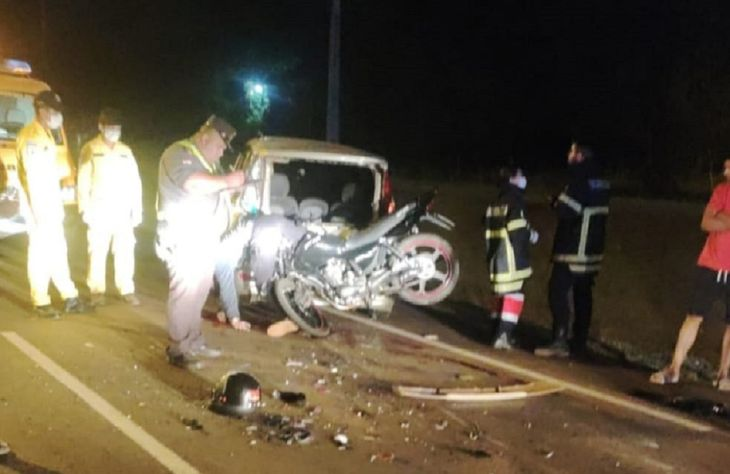

In [139]:
from IPython.display import Image
r_img=requests.get(img_src)
r_img.status_code
Image(r_img.content)